In [1]:
"""
make energy deposit plot in TOF
@aurthor Jiancheng Zeng
@Nov 20 2021
"""

'\nmake energy deposit plot in TOF\n@aurthor Jiancheng Zeng\n@Nov 20 2021\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics
import time
from numpy import array
import pandas as pd
import math
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
import random
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [3]:
"""
Vector title: [0]Event number/[1]energy deposit on the outer TOF/[2]energy deposit on the inner TOF/[3]time in between TOF/[4]angle in between TOF/[5]distance in between TOF/[6]distance travel inside LArTPC/[7]penetration depth on z/[8]distance on the side/[9]initial energy/[10]event type
"""

anti_proton_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_proton_5e7_Ene_0_500_vector.txt", delimiter = ' '))
anti_deuteron_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_deuteron_5e7_Ene_0_600_vector.txt", delimiter = ' '))
anti_He3_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_He3_5e7_Ene_0_1500_vector.txt", delimiter = ' '))

print("finish reading data!")

finish reading data!


In [4]:
sigma = 0.16    #energy resolution percentage
deltaT = 0.5    #timing resolution/ns

anti_proton = anti_proton_Old[anti_proton_Old[:, 10] == 1]
anti_He3 = anti_He3_Old[anti_He3_Old[:, 10] == 1]
time_pbar_err = []
dEOut_pbar_err = []
dEIn_pbar_err = []

time_He3bar_err = []
dEOut_He3bar_err = []
dEIn_He3bar_err = []

for i in range(len(anti_proton[:, 3])):
    dEOut_pbar_err.append(random.gauss(anti_proton[i, 1], sigma * anti_proton[i, 1]))
    dEIn_pbar_err.append(random.gauss(anti_proton[i, 2], sigma * anti_proton[i, 2]))
    time_pbar_err.append(anti_proton[i, 3] + deltaT * 2 * (random.random() - 0.5))
    if(i<len(anti_He3[:, 3])):
        dEOut_He3bar_err.append(random.gauss(anti_He3[i, 1], sigma * anti_He3[i, 1]))
        dEIn_He3bar_err.append(random.gauss(anti_He3[i, 2], sigma * anti_He3[i, 2]))
        time_He3bar_err.append(anti_He3[i, 3] + deltaT * 2 * (random.random() - 0.5))
    print("applying error:"+str(int(100*i/len(anti_proton[:, 3])))+"%", end='\r')
    
time_pbar_err = np.array(time_pbar_err)
dEOut_pbar_err = np.array(dEOut_pbar_err)
dEIn_pbar_err = np.array(dEIn_pbar_err)

time_He3bar_err = np.array(time_He3bar_err)
dEOut_He3bar_err = np.array(dEOut_He3bar_err)
dEIn_He3bar_err = np.array(dEIn_He3bar_err)
print("Finished processing!")

Finished processing!


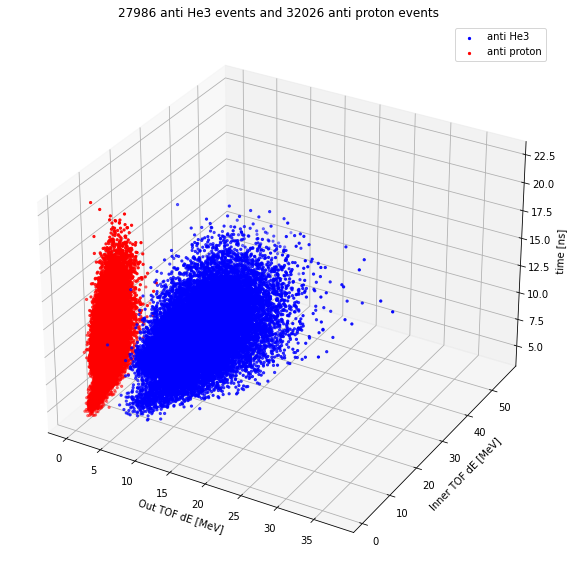

In [5]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err, dEIn_He3bar_err, time_He3bar_err, marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err, dEIn_pbar_err, time_pbar_err, marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
plt.legend()
plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3[:, 2]), len(anti_proton[:, 2])))
plt.savefig("./TOF3D.jpg")
plt.show()


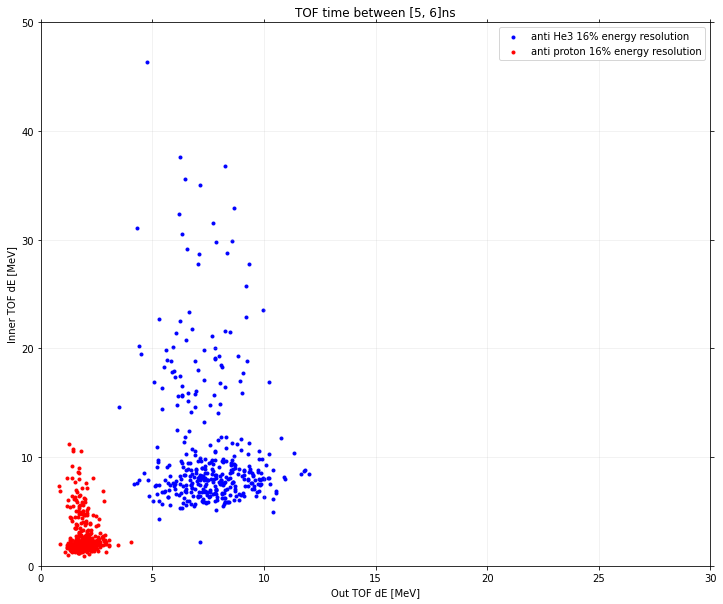

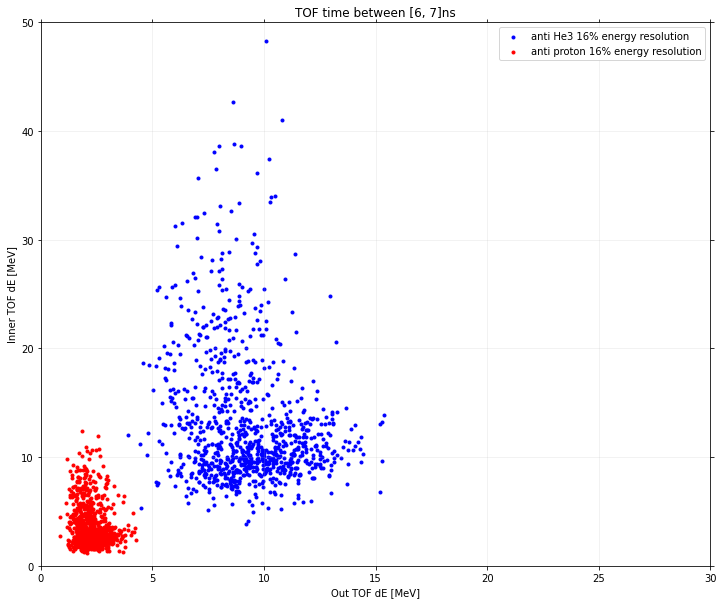

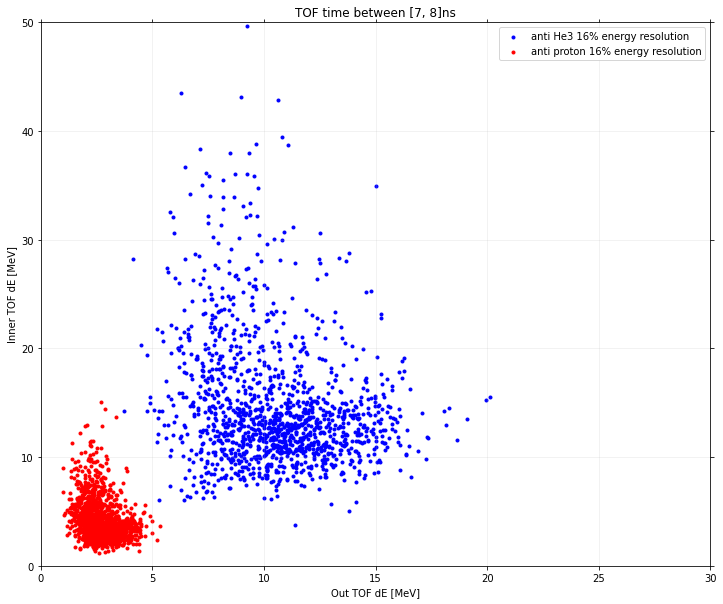

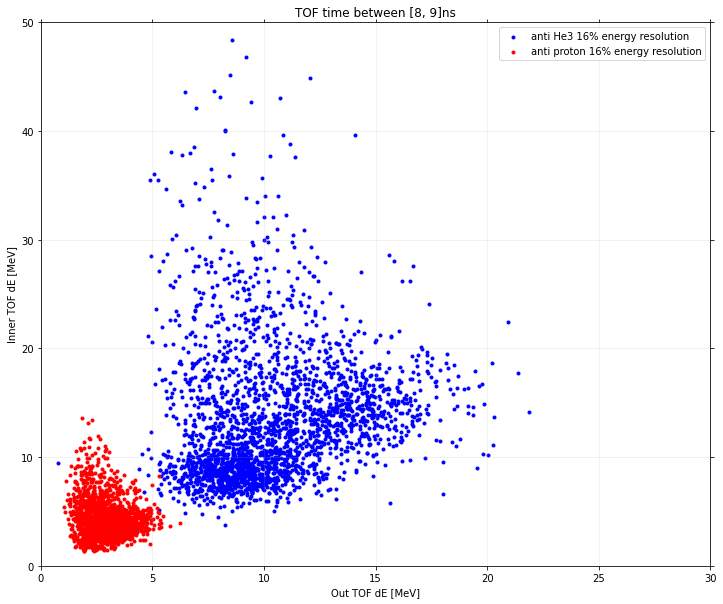

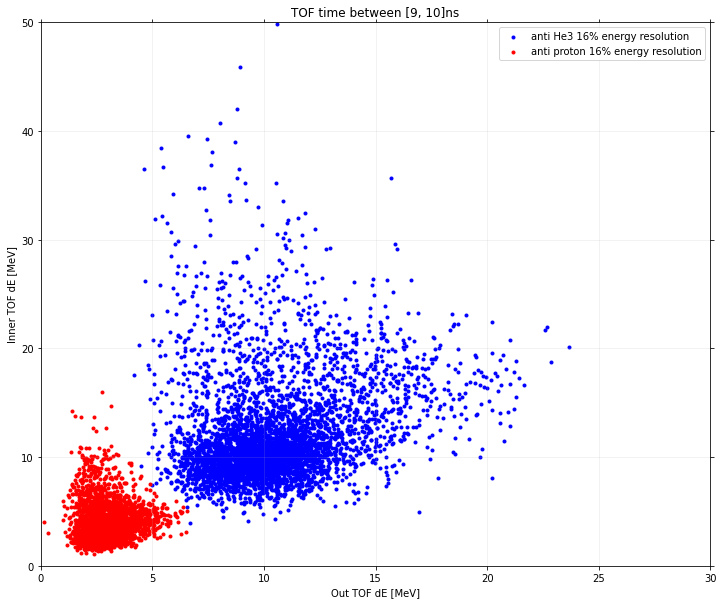

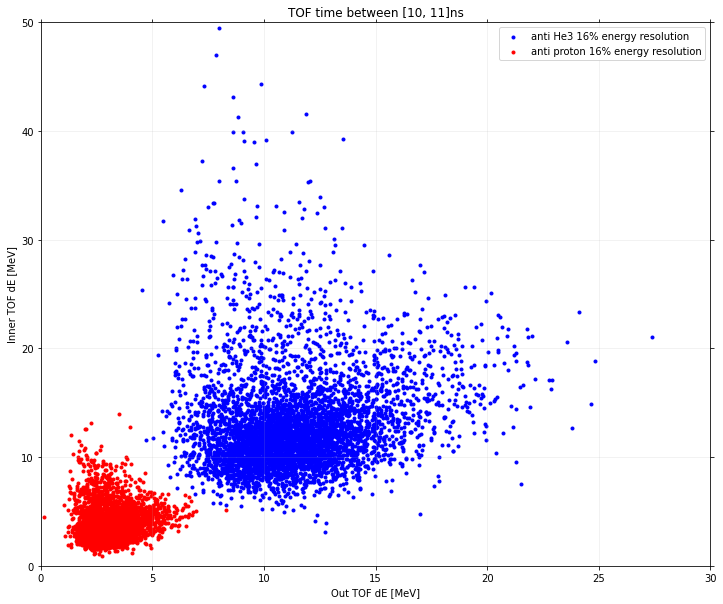

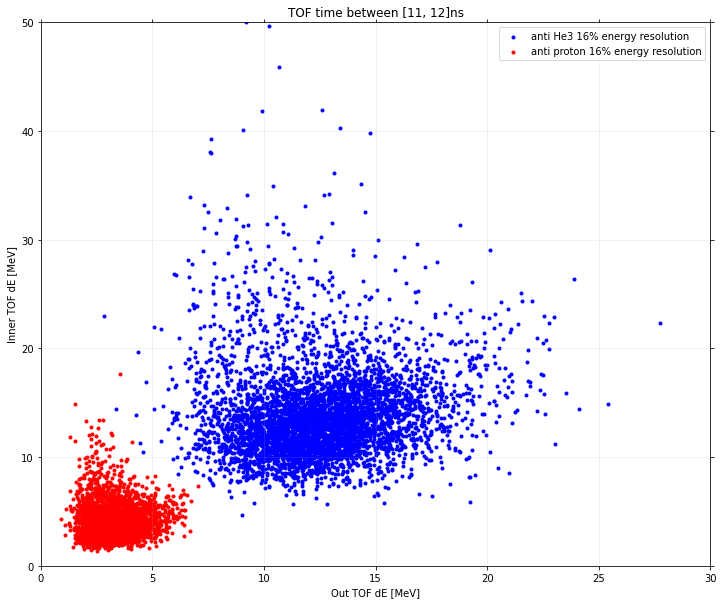

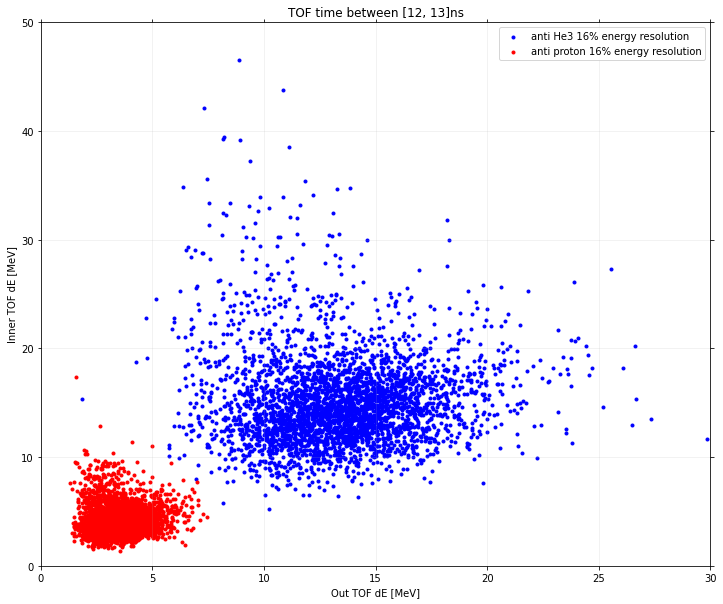

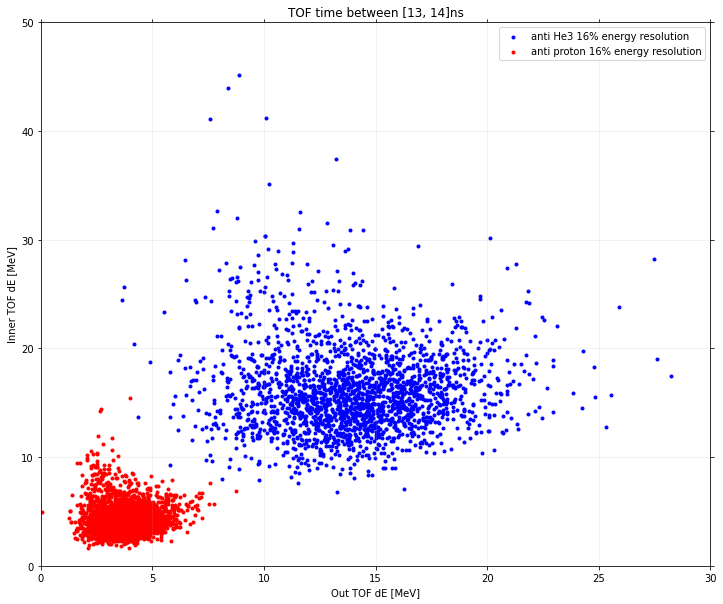

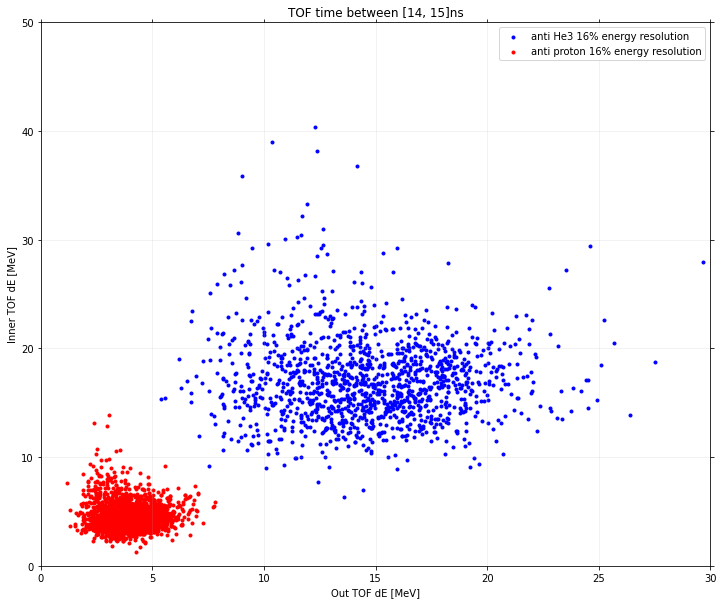

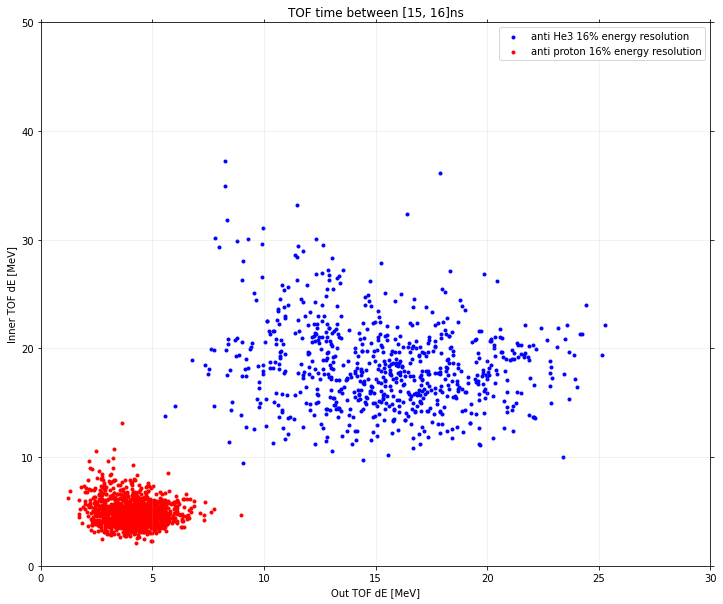

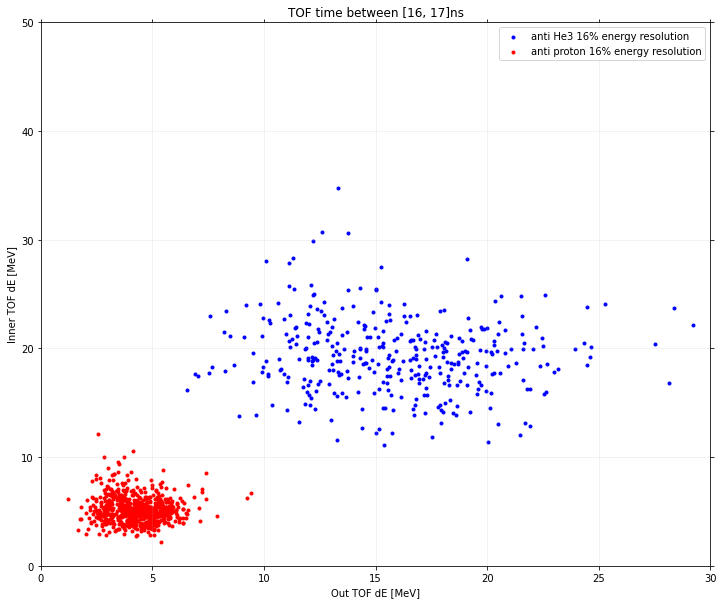

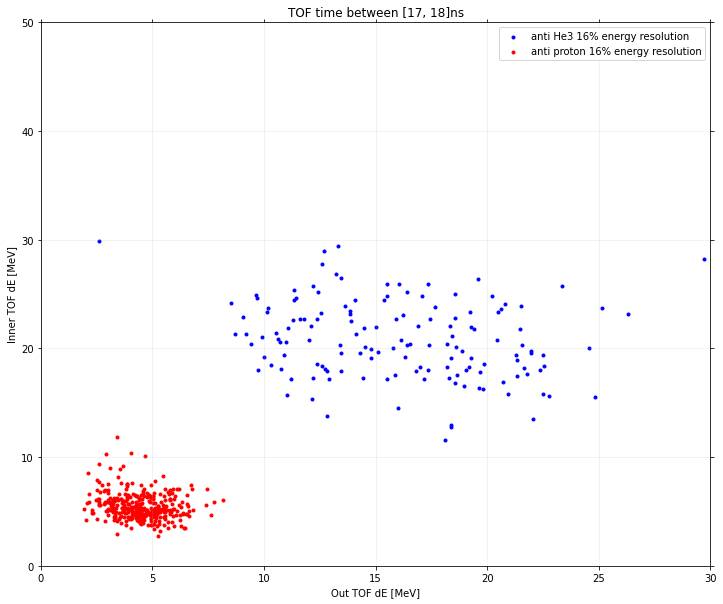

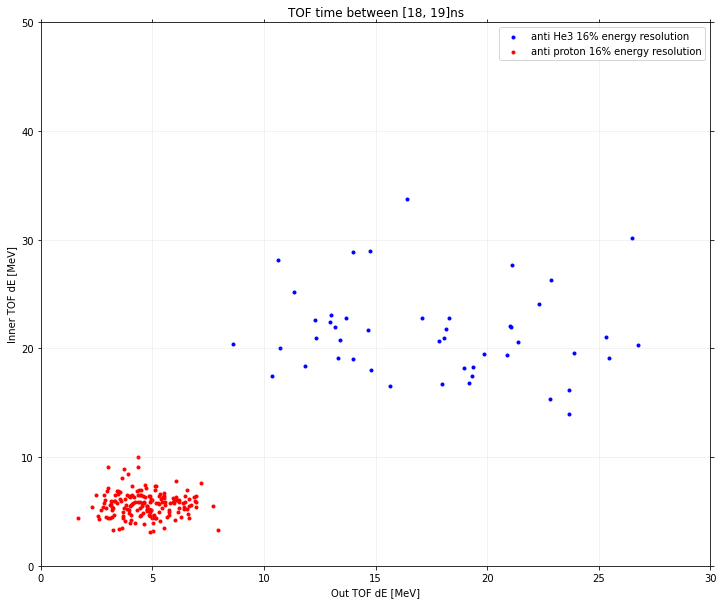

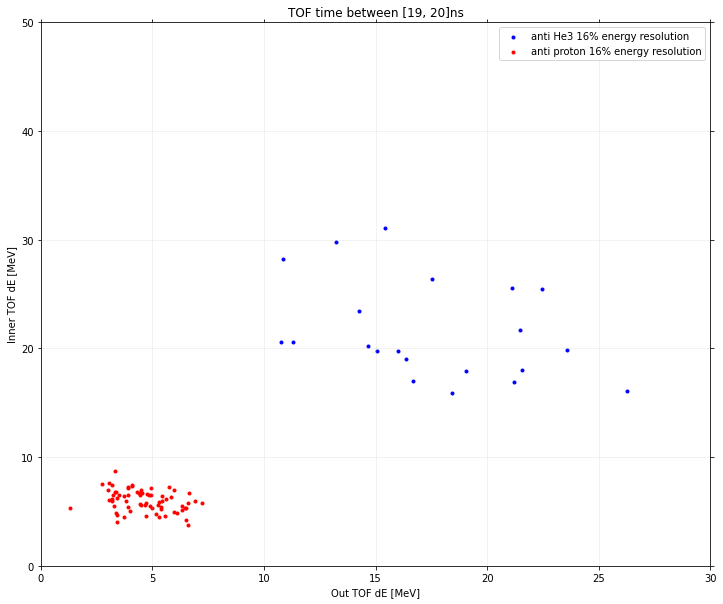

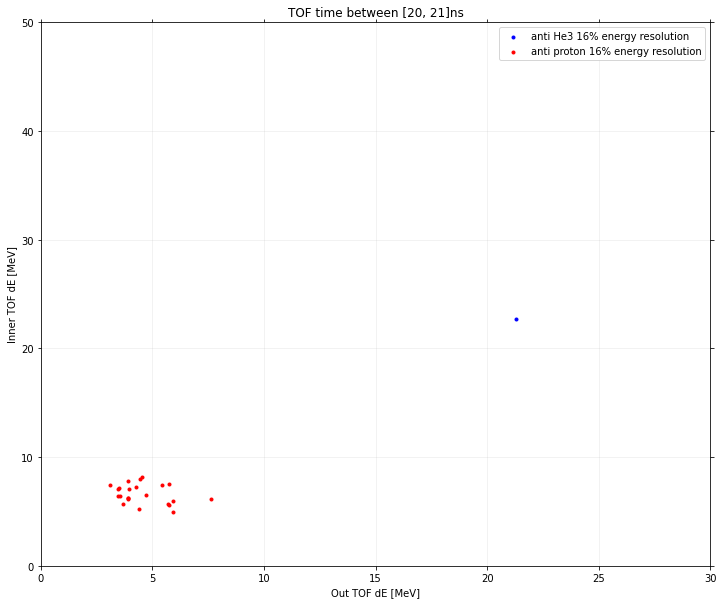

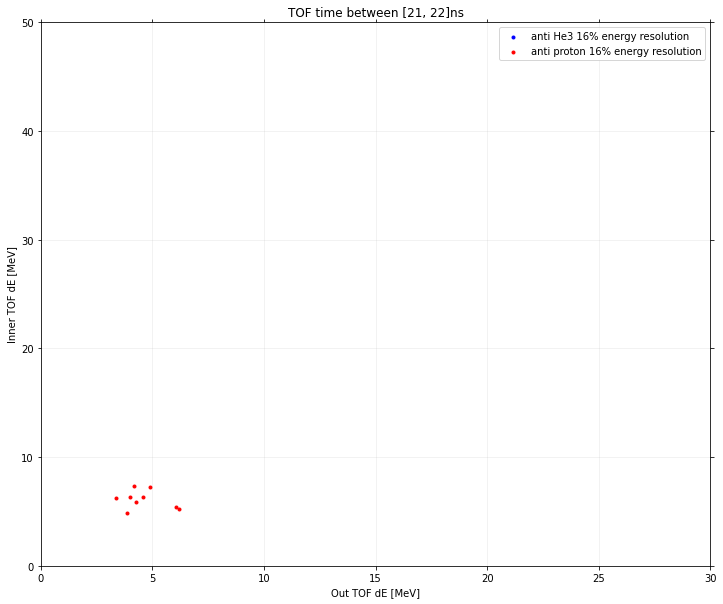

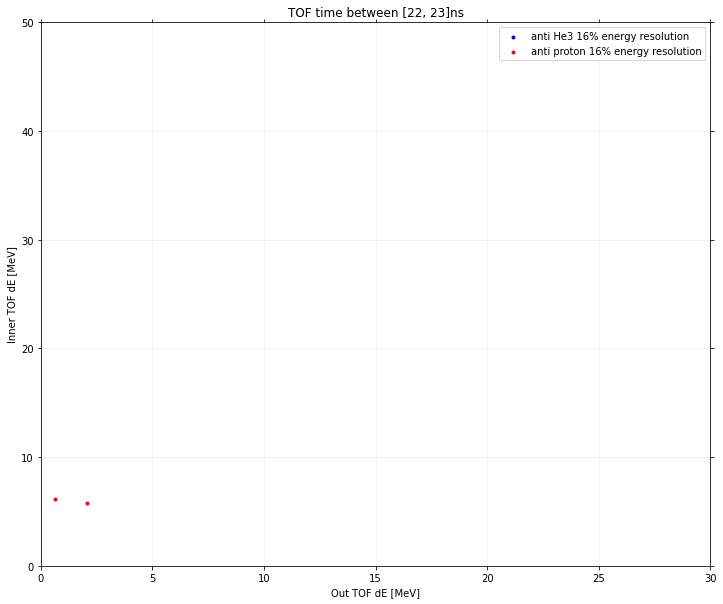

In [6]:
start_time = 5
#matplotlib.rcParams.update({'font.size': 30})
for n in range(18):
    fig = plt.figure(figsize=(12,10))
    plt.cla()
    plt.scatter(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], dEIn_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], label = "anti He3 %d%% energy resolution"%(100*sigma), marker = '.', color = 'b')
    plt.scatter(dEOut_pbar_err[np.logical_and(time_pbar_err > start_time+n, time_pbar_err < start_time + 1 +n)] , dEIn_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)], label = "anti proton %d%% energy resolution"%(100*sigma), marker = '.', color = 'r')
    #plt.scatter(dEOut_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], dEIn_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], label = "anti deuteron 45 degree", marker = '.', color = 'lightcoral')
    plt.grid(alpha = 0.2)
    plt.legend()
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.xlim([0, 30])
    plt.ylim([0, 50])
    plt.show()
    time.sleep(1)

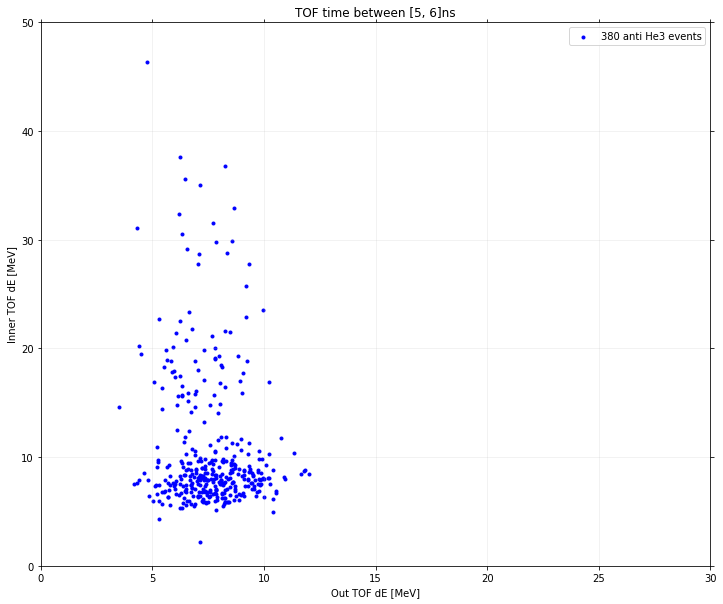

Outer TOF cut:4.0368555602720155
Inner TOF cut:11.188639681800858
antiproton number:359
antiHe3 number:380
cut efficiency:0.9973753280839895


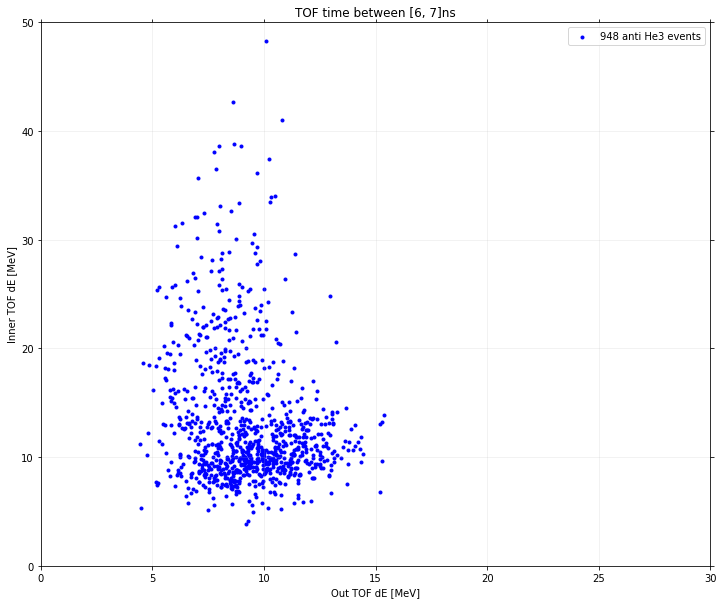

Outer TOF cut:4.272499791852631
Inner TOF cut:12.389656211630257
antiproton number:962
antiHe3 number:949
cut efficiency:0.9978947368421053


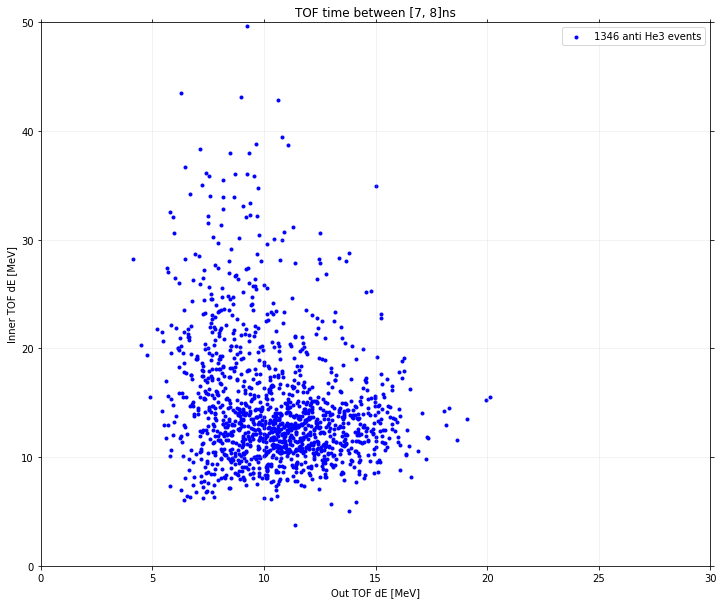

Outer TOF cut:5.326043017713504
Inner TOF cut:15.066324941588558
antiproton number:1533
antiHe3 number:1355
cut efficiency:0.9926253687315634


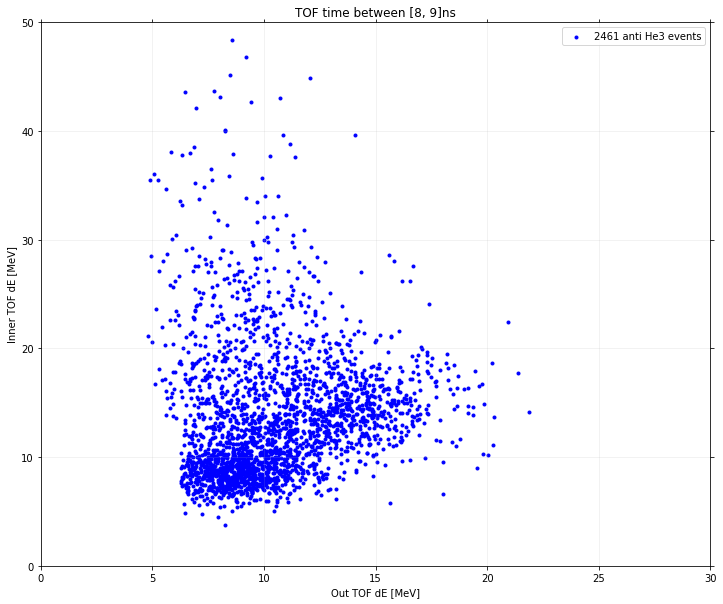

Outer TOF cut:6.217819174461477
Inner TOF cut:13.618147243654356
antiproton number:1957
antiHe3 number:2516
cut efficiency:0.977751291219706


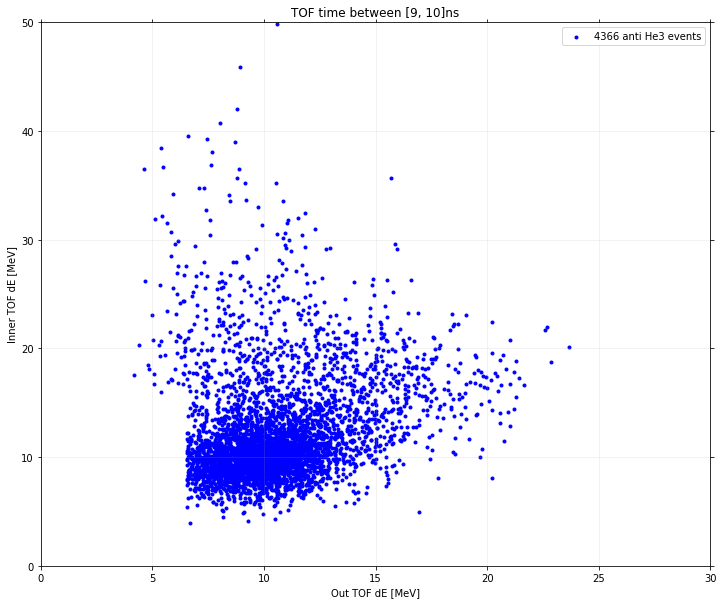

Outer TOF cut:6.53759622439574
Inner TOF cut:16.015147669562168
antiproton number:3612
antiHe3 number:4471
cut efficiency:0.9762969588550984


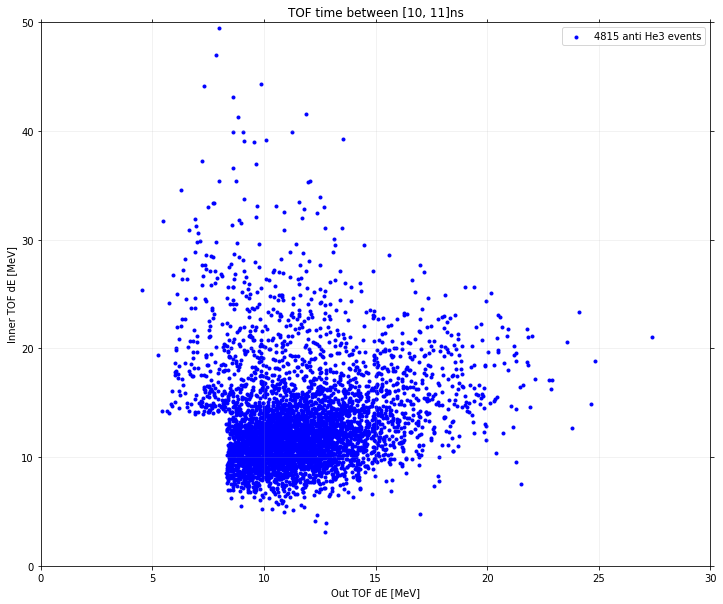

Outer TOF cut:8.316468155946072
Inner TOF cut:13.961828778050807
antiproton number:5315
antiHe3 number:5158
cut efficiency:0.9333204109323512


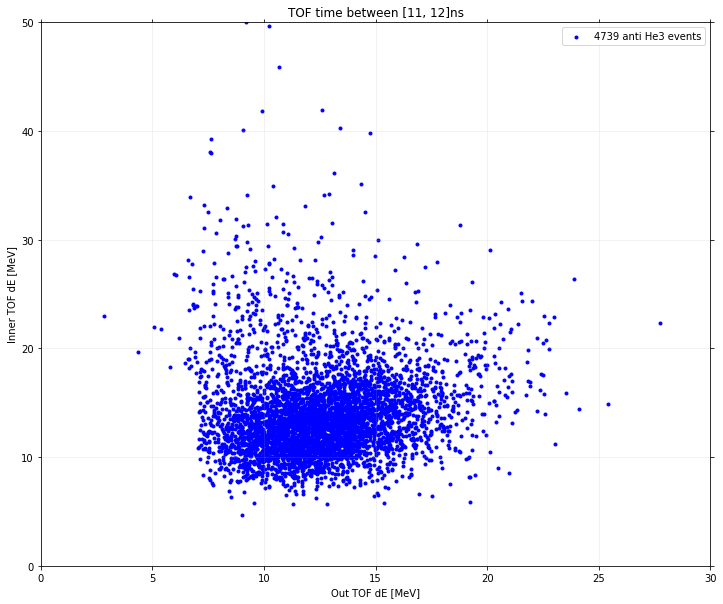

Outer TOF cut:7.037158712999044
Inner TOF cut:17.67867582132136
antiproton number:5363
antiHe3 number:4796
cut efficiency:0.9879091098603294


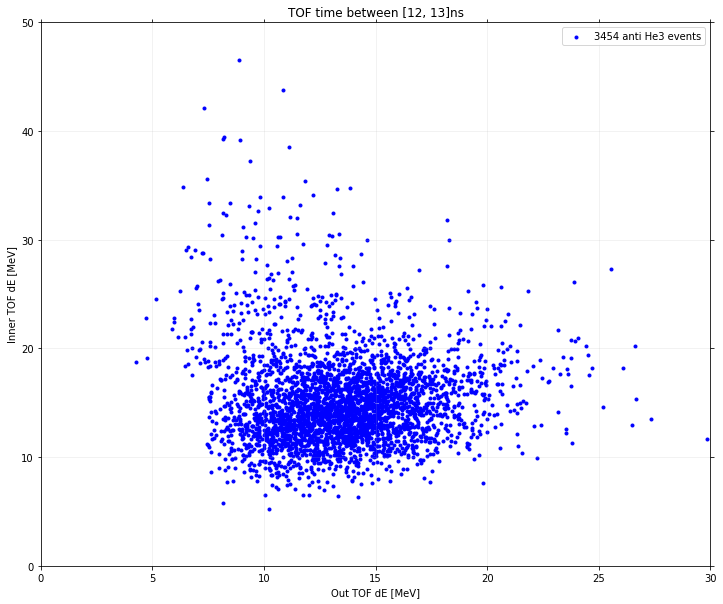

Outer TOF cut:7.4426732566523235
Inner TOF cut:17.382368152686112
antiproton number:4784
antiHe3 number:3499
cut efficiency:0.9868571428571429


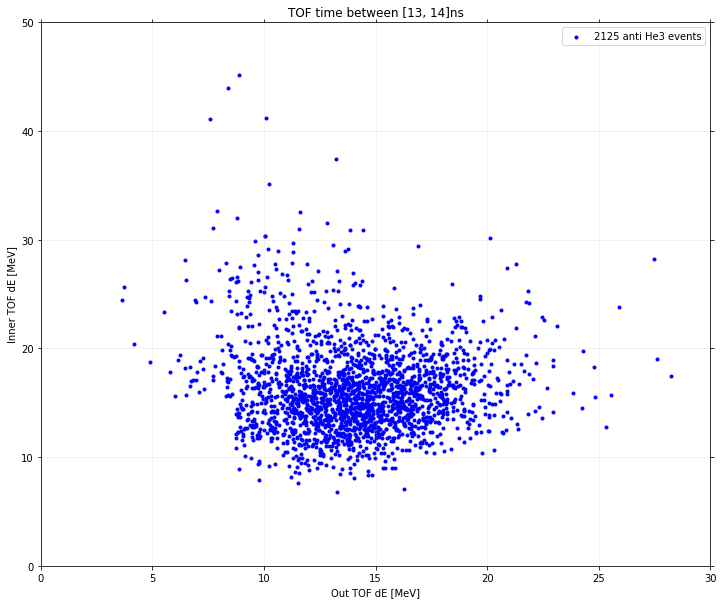

Outer TOF cut:8.722697836034321
Inner TOF cut:15.469555340040865
antiproton number:3428
antiHe3 number:2165
cut efficiency:0.9810710987996306


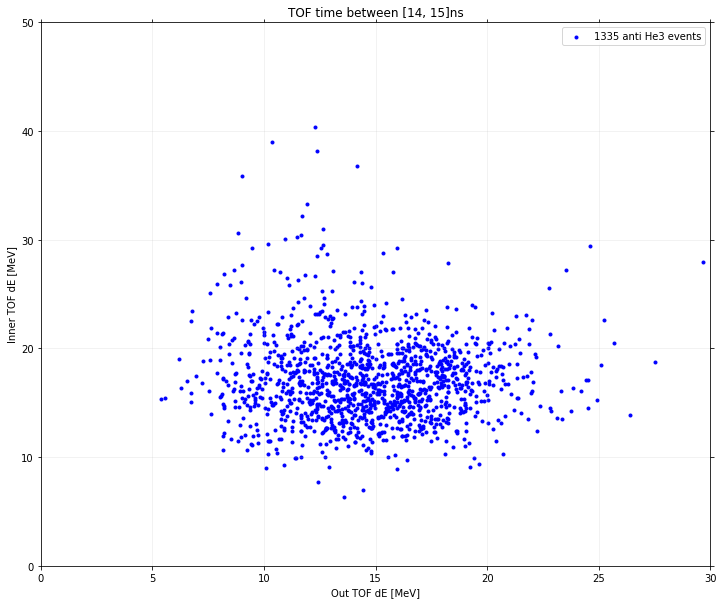

Outer TOF cut:7.808381541338171
Inner TOF cut:13.884489192910493
antiproton number:2101
antiHe3 number:1339
cut efficiency:0.996268656716418


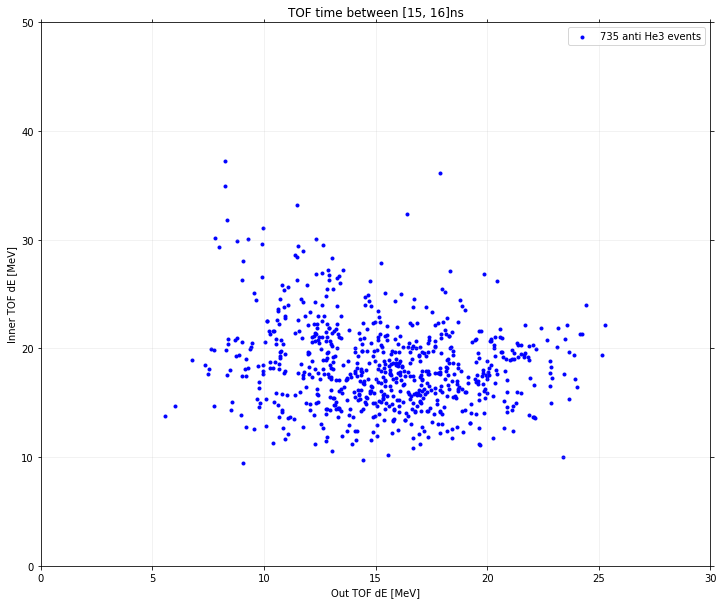

Outer TOF cut:8.968899970718132
Inner TOF cut:13.143306410770691
antiproton number:1283
antiHe3 number:736
cut efficiency:0.9972862957937585


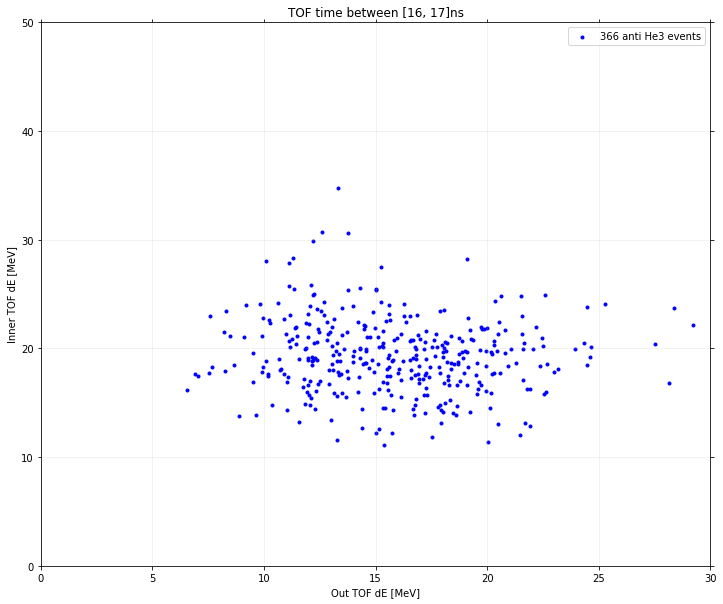

Outer TOF cut:9.42908311716598
Inner TOF cut:12.16051961605144
antiproton number:667
antiHe3 number:366
cut efficiency:0.997275204359673


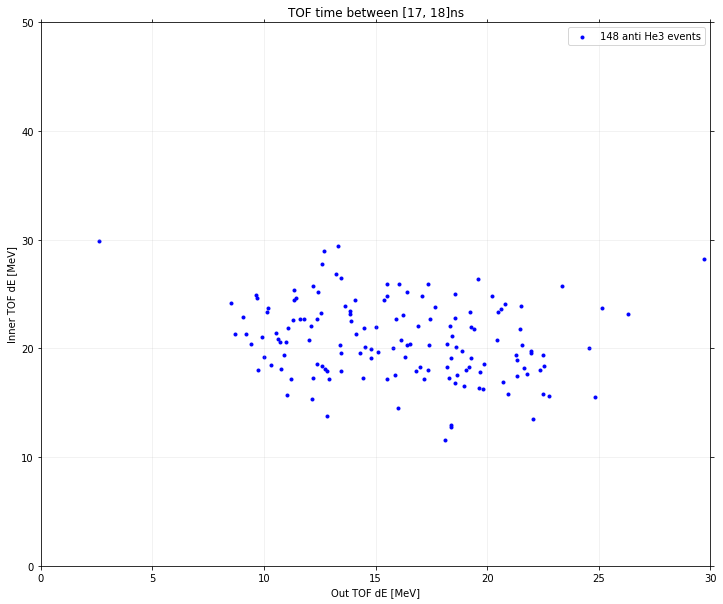

Outer TOF cut:8.163247209047341
Inner TOF cut:11.832674240904744
antiproton number:346
antiHe3 number:148
cut efficiency:0.9932885906040269


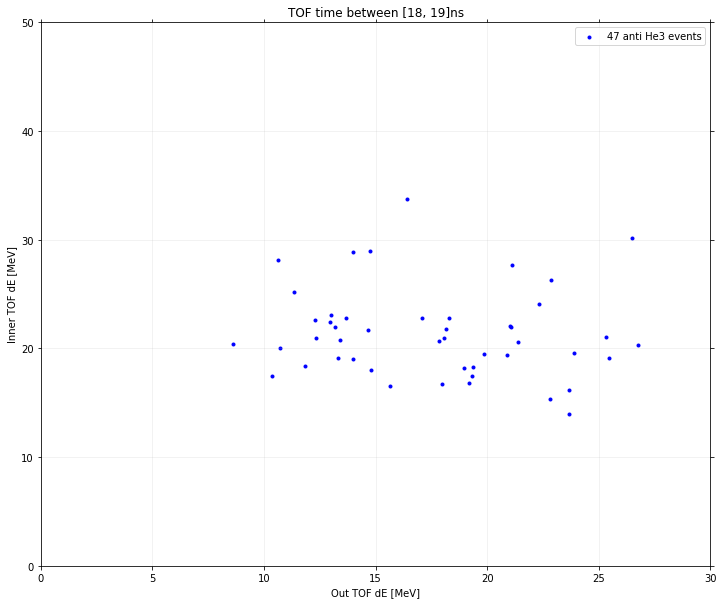

Outer TOF cut:7.91577209604506
Inner TOF cut:9.970018011170916
antiproton number:175
antiHe3 number:47
cut efficiency:0.9791666666666666


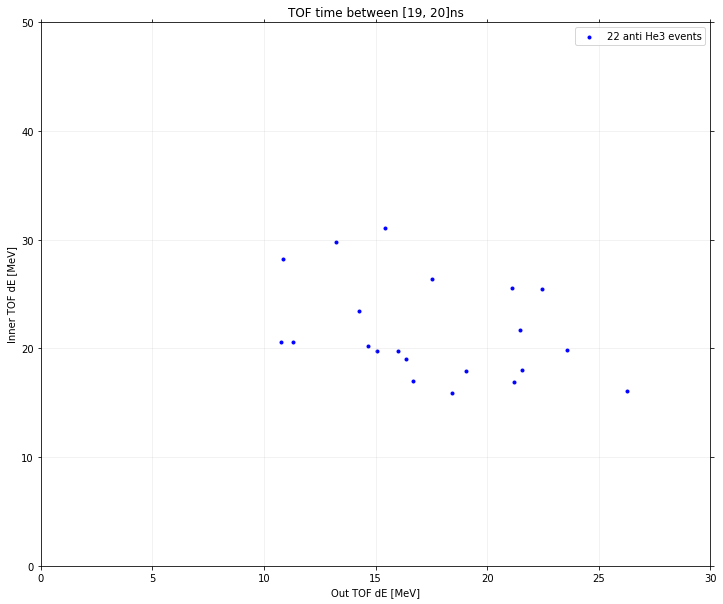

Outer TOF cut:7.215808224527814
Inner TOF cut:8.719884740668679
antiproton number:69
antiHe3 number:22
cut efficiency:0.9565217391304348


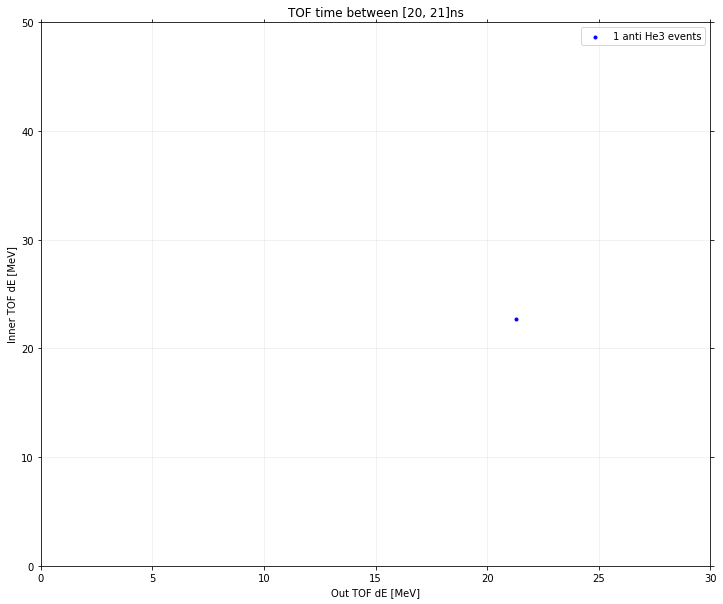

Outer TOF cut:7.6357513537737685
Inner TOF cut:8.132096349455594
antiproton number:23
antiHe3 number:1
cut efficiency:0.5


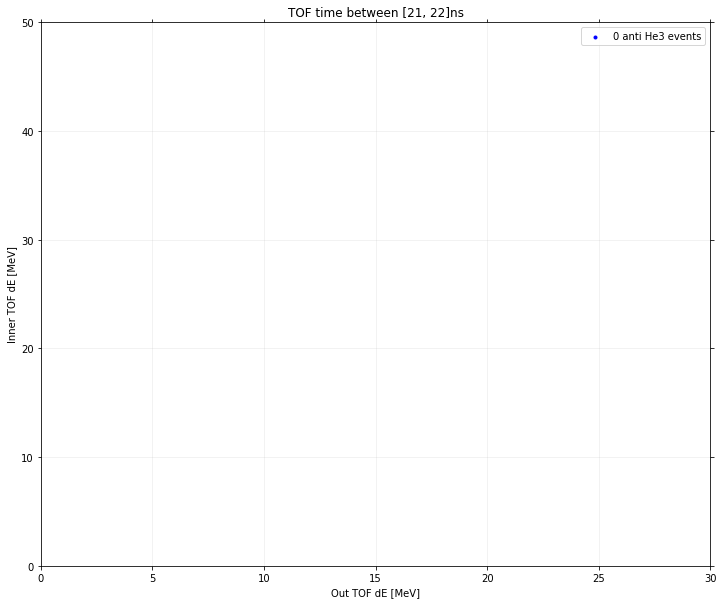

Outer TOF cut:6.209412453129093
Inner TOF cut:7.376530046739472
antiproton number:9
antiHe3 number:0
cut efficiency:0.0


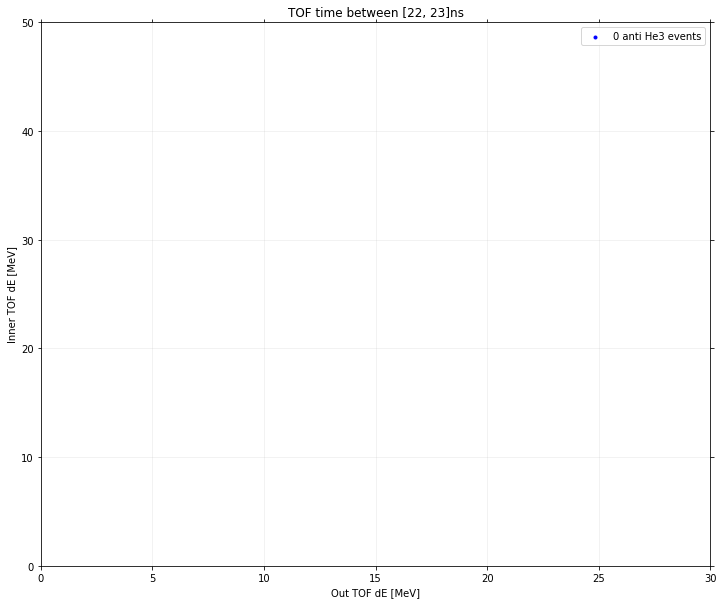

Outer TOF cut:2.079233150471479
Inner TOF cut:6.129781132431056
antiproton number:2
antiHe3 number:0
cut efficiency:0.0
Finished!
 27288 anti He3 events been kept
Average cut efficiency = 97%


In [7]:
start_time = 5
low_limit = 10
high_limit = 11
events_kept = 0

#matplotlib.rcParams.update({'font.size': 30})
for n in range(18):
    fig = plt.figure(figsize=(12,10))
    N_x = []
    N_y = []
    He3bar_cut_x = []
    He3bar_cut_y = []
    plt.cla()
    cut_min_x = np.max(dEOut_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)]) 
    cut_min_y = np.max(dEIn_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)])
    He3bar_cut_x = dEOut_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    He3bar_cut_y = dEIn_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    N_x = He3bar_cut_x[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    N_y = He3bar_cut_y[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    plt.scatter(N_x, N_y, marker = '.', color = 'b', label = '%d anti He3 events'%len(N_y))
    plt.grid(alpha = 0.2)
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.legend()
    plt.xlim([0, 30])
    plt.ylim([0, 50])
    plt.show()
    events_kept = events_kept + len(N_y)
    print("Outer TOF cut:"+str(cut_min_x))
    print("Inner TOF cut:"+str(cut_min_y))
    print("antiproton number:"+str(len(dEOut_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)])))
    print("antiHe3 number:"+str(len(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)])))
    print("cut efficiency:"+str(len(N_x)/(len(He3bar_cut_x)+1)))
    
print("Finished!\n %d anti He3 events been kept"%events_kept)
print("Average cut efficiency = %d%%"%(100*events_kept/len(anti_He3[:, 2])))

In [8]:
print(len(anti_He3_Old[anti_He3_Old[:, 10]==1]))
print(len(anti_He3_Old[anti_He3_Old[:, 10]==0]))
print(len(anti_proton_Old[anti_proton_Old[:, 10]==1]))
print(len(anti_proton_Old[anti_proton_Old[:, 10]==0]))

27986
45150
32026
48725


0.492


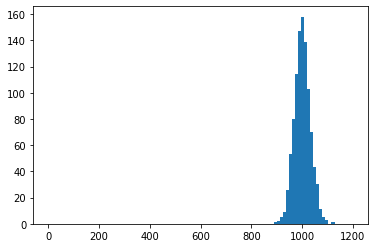

In [9]:
s = np.random.poisson(1000, 1000)
plt.hist(s, bins = 100, range=[0, 1200])
print(len(s[s>1001])/1000)